In [13]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# read all datasets
temporal_data = pd.read_excel("Monthly_temp_indices.xlsx",sheet_name= 'Tnx', parse_dates =[['Year', 'Month']], index_col = 'Year_Month')

temporal_data

,Barisal,Bhola,Bogra,Comilla,Cox's bazar,Dhaka,Foridpur,Feni,Jessor,Khulna,Madaripur,Mymensingh,Patuakhali,Rajshahi,Rangamati,Rangpur,Sandwip,Sitakunda,Sylhet,Teknaf
Year_Month,,,,,,,,,,,,,,,,,,,,
1980-01-01,16.0,17.8,15.3,20.0,18.0,17.8,18.8,19.6,15.8,20.1,18.1,14.6,-99.9,15.0,19.2,14.6,18.0,20.5,15.7,20.2
1980-02-01,21.5,23.0,18.6,22.2,21.0,22.8,21.8,23.9,22.1,23.6,23.2,31.6,-99.9,21.1,21.1,22.5,23.0,25.5,20.1,21.4
1980-03-01,24.5,25.0,24.4,25.0,24.6,25.6,28.2,26.1,25.0,25.2,25.0,23.5,-99.9,23.9,25.7,23.4,25.0,25.5,23.2,27.5
1980-04-01,27.5,27.8,27.1,26.7,29.0,27.8,27.2,27.8,27.6,28.6,27.9,27.5,-99.9,28.7,27.4,29.6,26.3,28.5,26.4,29.3
1980-05-01,28.0,28.4,27.2,28.1,28.0,27.8,27.0,28.7,28.4,29.2,28.5,27.4,-99.9,28.7,28.3,26.9,29.5,29.5,25.5,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,28.0,27.5,28.6,28.0,26.6,28.2,28.1,27.2,27.6,28.5,27.6,28.3,28.2,28.0,25.6,28.5,27.3,26.6,26.5,27.0
2017-09-01,27.5,27.6,28.7,28.4,27.0,29.2,28.3,27.8,28.0,28.8,27.8,28.6,28.0,27.8,26.0,28.5,27.1,26.7,28.0,27.0
2017-10-01,27.0,26.4,27.5,27.0,27.5,27.6,27.0,26.7,27.0,27.5,26.9,27.3,26.5,27.2,26.3,27.0,27.0,26.6,26.6,27.6


In [15]:
temporal_data['Barisal']


Year_Month
1980-01-01    16.0
1980-02-01    21.5
1980-03-01    24.5
1980-04-01    27.5
1980-05-01    28.0
              ... 
2017-08-01    28.0
2017-09-01    27.5
2017-10-01    27.0
2017-11-01    23.0
2017-12-01    22.0
Name: Barisal, Length: 456, dtype: float64

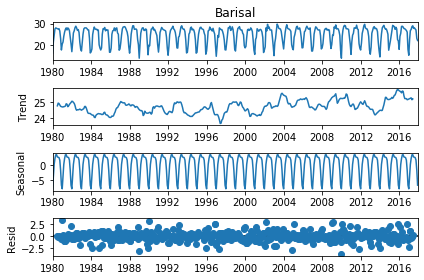

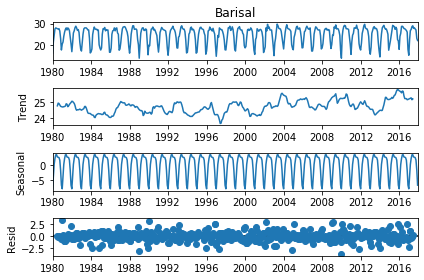

In [17]:

components = seasonal_decompose(temporal_data['Barisal'], model='additive')
components.plot()

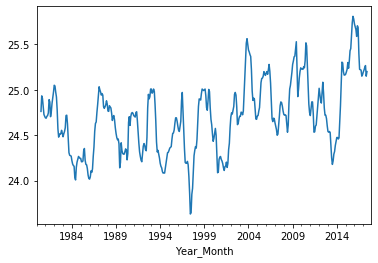

In [18]:
components.trend.plot()

In [7]:
Barisal_tnx_trend = components.trend.dropna()

In [8]:
Barisal_tnx_trend.head(20)

Year_Month
1980-07-01    25.058333
1980-08-01    24.987500
1980-09-01    24.812500
1980-10-01    24.658333
1980-11-01    24.550000
1980-12-01    24.558333
1981-01-01    24.591667
1981-02-01    24.579167
1981-03-01    24.566667
1981-04-01    24.612500
1981-05-01    24.725000
1981-06-01    24.875000
1981-07-01    24.879167
1981-08-01    24.787500
1981-09-01    24.808333
1981-10-01    24.912500
1981-11-01    25.025000
1981-12-01    25.079167
1982-01-01    25.133333
1982-02-01    25.145833
Name: trend, dtype: float64

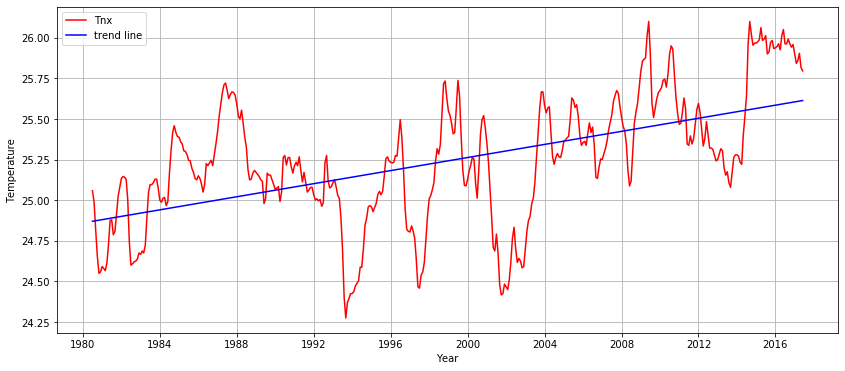

In [20]:
DTR = Barisal_tnx_trend

fig, ax = plt.subplots(figsize=(14, 6))
res = mk.hamed_rao_modification_test(DTR)
trend_line = np.arange(len(DTR)) * res.slope + res.intercept


ax.plot(DTR, color='red')
ax.plot(DTR.index, trend_line, color='blue')
ax.legend(['Tnx', 'trend line'])

plt.xlabel('Year')
plt.ylabel('Temperature')

plt.grid(True)
plt.show()

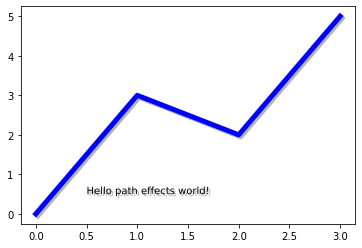

In [40]:
import matplotlib.patheffects as path_effects

text = plt.text(0.5, 0.5, 'Hello path effects world!',
                path_effects=[path_effects.withSimplePatchShadow()])

plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.show()

In [70]:
DTR= temporal_data
winter = DTR.loc[(DTR.index.strftime("%b") == 'Dec', [Tnx]]






NameError: name 'Tnx' is not defined

In [76]:
indicesExcel = pd.ExcelFile("Transfomed indices.xlsx")

indicators = ['CDD', 'CWD', 'PRCPTOT', 'R10mm', 'R20mm', 'R30mm',
              'Rx1day', 'Rx3day', 'Rx5day', 'DRT', 'SU', 'Tnm',
              'Tmm', 'Txm', 'Txn','Txx', 'Tnn', 'Tnx', 'TR', 'TN10p',
              'Tx10p', 'Tx90p', 'tmge5', 'tmge10','Tn90p', 'Txge30',
              'Txge35', 'Txgt50p']



dataFrame = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
dataFrame.head()

,CDD,CWD,PRCPTOT,R10mm,R20mm,R30mm,Rx1day,Rx3day,Rx5day,DRT,...,TR,TN10p,Tx10p,Tx90p,tmge5,tmge10,Tn90p,Txge30,Txge35,Txgt50p
Year_Month,,,,,,,,,,,,,,,,,,,,,
1980-01-01,47,0,0,0,0,0,0,0,0,13.75,...,0,12.90,9.52,12.74,30,30,12.26,0,0,49.52
1980-02-01,35,3,55,3,0,0,18,28,40,13.89,...,2,20.69,17.07,0.00,29,29,13.79,9,0,45.86
1980-03-01,18,2,47,2,1,0,25,40,40,12.32,...,10,12.58,11.94,0.00,30,30,3.23,24,0,32.90
1980-04-01,12,1,13,0,0,0,7,9,9,9.44,...,29,3.33,0.00,12.50,28,28,32.00,28,11,88.00
1980-05-01,8,7,235,9,4,2,45,70,88,9.03,...,29,12.90,11.29,2.90,30,30,8.39,28,5,46.94


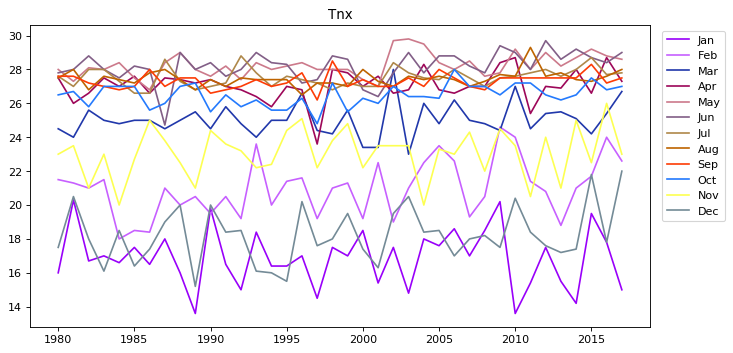

In [78]:
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.Year_Month]  # "https://blog.teamtreehouse.com/python-single-line-loops"
df['month'] = [d.strftime('%b') for d in df.Year_Month] # "https://www.programiz.com/python-programming/datetime/strftime"
months = df['month'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)

# indices selection
indc = 'Tnx'

# for indc in indicators:

# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
for i, m in enumerate(months):
    if i >= 0:        
        plt.plot('year', indc, data=df.loc[df.month==m, :], color=mycolors[i], label=m)
plt.title(indc)
plt.legend(bbox_to_anchor=(1.13, 1), loc='upper right')
plt.show()